In [1]:
#12.Write a python program to implement K-Means clustering Algorithm.

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
data = pd.read_csv("student_data.csv")

In [4]:
print("First 5 rows:")
print(data.head())

First 5 rows:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [5]:
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

In [6]:
data['Result'] = data['G3'].apply(lambda x: 1 if x >= 10 else 0)

In [7]:
X = data.drop(['G3', 'Result'], axis=1)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_

print("\nClustered Data:")
print(data[['Cluster', 'Result']].head())


Clustered Data:
   Cluster  Result
0        0       0
1        0       0
2        0       1
3        2       1
4        0       1


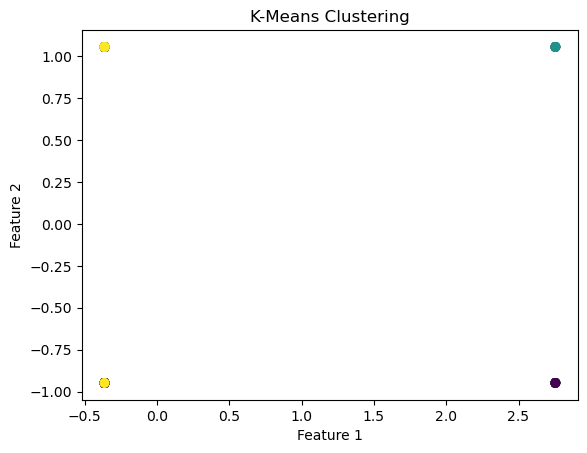

In [10]:
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'])
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()